In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
upper_YCbCr = np.array([235,180,135])
lower_YCbCr = np.array([0,135,90])

H = int(0.5*179)
S = int(0.68*255)
s = int(0.23*255)

upper_HSV = np.array([H, S, 255])
lower_HSV= np.array([0, s, 75])


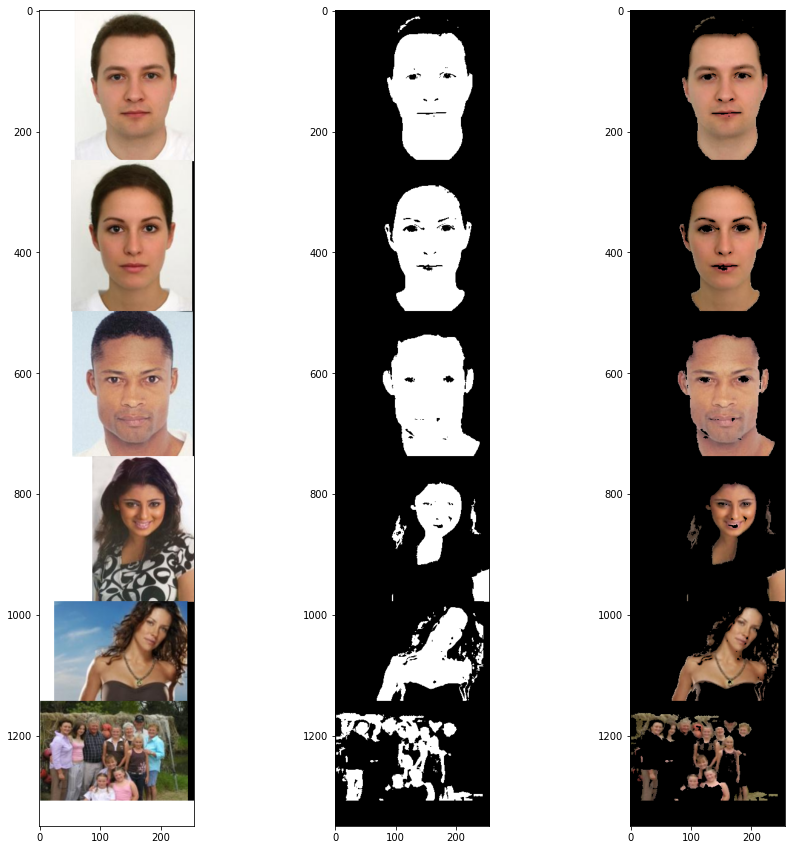

In [7]:
image =cv2.imread('faces.png')

#YCbCr
Yimage = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    
Ymask = cv2.inRange(Yimage, lower_YCbCr, upper_YCbCr)

# Yskin = cv2.bitwise_and(image,image,mask=mask)

#HSV
Himage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
Hmask = cv2.inRange(Himage, lower_HSV, upper_HSV)

# Hskin = cv2.bitwise_and(image,image,mask=mask)

mask = cv2.bitwise_and(Hmask,Ymask)

final = cv2.bitwise_and(image,image,mask=mask)

plt.figure(figsize=[15,15])
plt.subplot(1,3,1); plt.imshow(image[...,::-1])
plt.subplot(1,3,2); plt.imshow(mask,'gray')
plt.subplot(1,3,3); plt.imshow(final[...,::-1])

In [8]:
video = cv2.VideoCapture(0)


while True:
    flag , frame = video.read()
    frame = cv2.flip(frame, 1)
    #YCbCr
    Yimage = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)

    Ymask = cv2.inRange(Yimage, lower_YCbCr, upper_YCbCr)

    #HSV
    Himage = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    Hmask = cv2.inRange(Himage, lower_HSV, upper_HSV)
    
    mask = cv2.bitwise_and(Hmask,Ymask)

    skin_frame = cv2.bitwise_and(frame, frame, mask = mask)
    
    cv2.imshow('WebCam', frame)
    cv2.imshow('Skin', skin_frame)
    
    if cv2.waitKey(1) & 0xff == 27:
        break
        
cv2.destroyAllWindows()
video.release()